In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- pregnancy can be zero
- Glucose, BloodPressure, SkinThickness, Insulin, BMI can not be zero

In [7]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[i].replace(0, df[i].mean(), inplace = True)
    #try once with median

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
x = df.iloc[:, 1:-1]
y = df['Outcome']

In [10]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 123)

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
ac = accuracy_score(ytest, ypred)
cr = classification_report(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
print(f'Accuracy of the model is: {ac}')
print(f'Classification report: ')
print(cr)
print(f'Confusion Matrix: ')
print(cm)

Accuracy of the model is: 0.7864583333333334
Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       119
           1       0.78      0.62      0.69        73

    accuracy                           0.79       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.79      0.79      0.78       192

Confusion Matrix: 
[[106  13]
 [ 28  45]]


## Hypertune using Solver Parameter 

In [16]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)

In [17]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       119
           1       0.83      0.62      0.71        73

    accuracy                           0.81       192
   macro avg       0.82      0.77      0.78       192
weighted avg       0.81      0.81      0.80       192



In [18]:
logreg = LogisticRegression(solver = 'saga')
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)

In [19]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       119
           1       0.72      0.36      0.48        73

    accuracy                           0.70       192
   macro avg       0.71      0.64      0.63       192
weighted avg       0.71      0.70      0.67       192



In [20]:
#FEATURE SCALING

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [22]:
logreg = LogisticRegression(solver = 'saga')
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)

In [23]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       119
           1       0.78      0.62      0.69        73

    accuracy                           0.79       192
   macro avg       0.78      0.75      0.76       192
weighted avg       0.79      0.79      0.78       192



## ROC AUC cruve

In [27]:
print(f'Actual values: {ytest[:25].values}')
print(f'Predicted values: {ypred[:25]}')

Actual values: [1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1]
Predicted values: [1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1]


In [28]:
logreg.predict_proba(xtest)

array([[0.12705932, 0.87294068],
       [0.67011213, 0.32988787],
       [0.5414254 , 0.4585746 ],
       [0.95070107, 0.04929893],
       [0.90163946, 0.09836054],
       [0.43075643, 0.56924357],
       [0.12508511, 0.87491489],
       [0.75697718, 0.24302282],
       [0.38193089, 0.61806911],
       [0.70801302, 0.29198698],
       [0.1860971 , 0.8139029 ],
       [0.91137668, 0.08862332],
       [0.87818696, 0.12181304],
       [0.73535121, 0.26464879],
       [0.18744081, 0.81255919],
       [0.95479461, 0.04520539],
       [0.86851312, 0.13148688],
       [0.91807678, 0.08192322],
       [0.94546878, 0.05453122],
       [0.51853629, 0.48146371],
       [0.37292553, 0.62707447],
       [0.78797713, 0.21202287],
       [0.71295841, 0.28704159],
       [0.07440851, 0.92559149],
       [0.03664016, 0.96335984],
       [0.89465947, 0.10534053],
       [0.93915241, 0.06084759],
       [0.73304468, 0.26695532],
       [0.69216637, 0.30783363],
       [0.21920168, 0.78079832],
       [0.

- first column gives value of the probability that 1st point chances of being predicted 0
- Second column gives probabilistic value that 1st point chances of being predicted 1

In [29]:
ypredprob = logreg.predict_proba(xtest)[:,1]

In [30]:
#changing the threshold manually

In [31]:
from sklearn.preprocessing import binarize

In [32]:
ypred = binarize([ypredprob], threshold = 0.3)

In [33]:
ypred

array([[1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
        1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
        0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0.,
        1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
        1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
        0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.]])

In [34]:
print(f'Actual values: {ytest[:25].values}')
print(f'Predic values: {ypred[:25]}')

Actual values: [1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1]
Predic values: [[1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
  1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1.
  1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0.
  1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0.
  1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0.
  0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.]]


In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(ytest, ypredprob)

In [38]:
thres

array([1.96335984, 0.96335984, 0.80161705, 0.79806024, 0.78079832,
       0.77951312, 0.7754836 , 0.77371245, 0.74070373, 0.73781604,
       0.71151441, 0.68877272, 0.63302423, 0.62707447, 0.61806911,
       0.59993984, 0.56924357, 0.56877678, 0.5628317 , 0.55666796,
       0.53949206, 0.52283911, 0.48340907, 0.47982204, 0.46970069,
       0.4585746 , 0.42792597, 0.40032021, 0.38244908, 0.37309921,
       0.35037646, 0.31489008, 0.31008158, 0.3094731 , 0.30783363,
       0.29198698, 0.29050283, 0.28771864, 0.28704159, 0.27754938,
       0.27736724, 0.27055582, 0.26695532, 0.26464879, 0.25180372,
       0.24471817, 0.24302282, 0.21410815, 0.21295012, 0.20855056,
       0.20804687, 0.19783743, 0.18287774, 0.17983083, 0.17864004,
       0.15871972, 0.15740856, 0.14230942, 0.14058417, 0.13810356,
       0.13739289, 0.13175101, 0.13148688, 0.02270758])

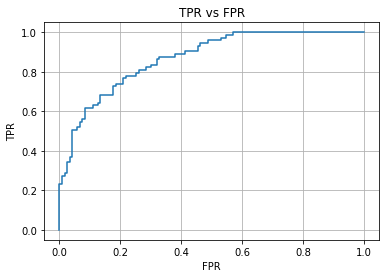

In [39]:
plt.title("TPR vs FPR")
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.show()